# Crack orientation with crack parallel stress $\sigma_{\mathrm{z}}$

In [22]:
import numpy as np
import sympy as sp


tau_fps, sigma_x, sigma_z = sp.symbols(r'\tau_\mathrm{fps}, sigma_x, sigma_z')
f_ct = sp.Symbol(r'f_ct')


sigma_xz = sp.Matrix([[sigma_x, tau_fps],
                     [tau_fps, sigma_z]])
sigma_xz

Matrix([
[          sigma_x, \tau_\mathrm{fps}],
[\tau_\mathrm{fps},           sigma_z]])

<img src="beam_crack_prop_sig_z.png" width="400"/> 

With the inclusion of the crack parallel stress, the stress tensor at the tip of the crack will be given as:
\begin{align}
\bar{\sigma}_{ij} = 
\left[
\begin{array}{cc}
\sigma_x & \tau_{\mathrm{fpz}} \\
\tau_{\mathrm{fpz}} & \sigma_z 
\end{array}
\right]
\label{eq: sigma_tip}
\end{align}
where the crack parallel stress $\sigma_z$, $\tau_\mathrm{fpz}$ will be obtained by the cantilever action and the parabolic profile of shear stress along the height of the cross section. 

Based on this stress tensor, the orientation of the crack can be attained by using principal stress directions:
\begin{align}
    \bar{\sigma}_{ij} = PDP^{-1}
    \label{eq: barsigma}
\end{align}

In [23]:
P_xz, D_xz = sigma_xz.diagonalize()
P_xz

Matrix([
[(sigma_x - sigma_z - sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2))/(2*\tau_\mathrm{fps}), (sigma_x - sigma_z + sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2))/(2*\tau_\mathrm{fps})],
[                                                                                                                     1,                                                                                                                      1]])

In [24]:
D_xz

Matrix([
[sigma_x/2 + sigma_z/2 - sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2)/2,                                                                                                    0],
[                                                                                                   0, sigma_x/2 + sigma_z/2 + sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2)/2]])

By assuming the tensile strength of concrete as the governing parameter for $\sigma_x$ and by equating $\sigma_x = f_{\mathrm{ct}}$, the solution for the horizontal stress can be evaluated based on the known $\sigma_z, \tau_{\mathrm{fpz}}$ as:

In [25]:
subs_sigma_x = sp.solve({D_xz[0,0] - f_ct}, {sigma_x})[0]
subs_sigma_x

{sigma_x: (-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z)}

In [26]:
sigma_xf = sigma_xz.subs(subs_sigma_x)
sigma_xf

Matrix([
[(-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z), \tau_\mathrm{fps}],
[                                                \tau_\mathrm{fps},           sigma_z]])

In [27]:
P_xf = P_xz.subs(subs_sigma_x)
D_xf = D_xz.subs(subs_sigma_x)
P_xf

Matrix([
[(-sigma_z - sqrt(4*\tau_\mathrm{fps}**2 + sigma_z**2 - 2*sigma_z*(-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z) + (-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)**2/(f_ct - sigma_z)**2) + (-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z))/(2*\tau_\mathrm{fps}), (-sigma_z + sqrt(4*\tau_\mathrm{fps}**2 + sigma_z**2 - 2*sigma_z*(-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z) + (-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)**2/(f_ct - sigma_z)**2) + (-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z))/(2*\tau_\mathrm{fps})],
[                                                                                                                                                                                                                                                                                                       1,                                                                                               

In [28]:
theta_xz = sp.atan( sp.simplify(-P_xf[0,0] / P_xf[1,0]))
theta_xz

atan((\tau_\mathrm{fps}**2 - f_ct**2 + f_ct*sigma_z + (f_ct - sigma_z)*(sigma_z + sqrt((2*sigma_z*(f_ct - sigma_z)*(\tau_\mathrm{fps}**2 - f_ct**2 + f_ct*sigma_z) + (4*\tau_\mathrm{fps}**2 + sigma_z**2)*(f_ct - sigma_z)**2 + (\tau_\mathrm{fps}**2 - f_ct**2 + f_ct*sigma_z)**2)/(f_ct - sigma_z)**2)))/(2*\tau_\mathrm{fps}*(f_ct - sigma_z)))

In [29]:
get_theta_xz = sp.lambdify((tau_fps, f_ct, sigma_z), theta_xz)
get_theta_xz

<function _lambdifygenerated(Dummy_47, f_ct, sigma_z)>

In [30]:
get_sigma_x_val = sp.lambdify((tau_fps, f_ct, sigma_z),sigma_xf[0,0])
get_sigma_x_val

<function _lambdifygenerated(Dummy_48, f_ct, sigma_z)>

<lambdifygenerated-3>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (arctan((1/2)*(Dummy_47**2 - f_ct**2 + f_ct*sigma_z + (f_ct - sigma_z)*(sigma_z + sqrt((2*sigma_z*(f_ct - sigma_z)*(Dummy_47**2 - f_ct**2 + f_ct*sigma_z) + (4*Dummy_47**2 + sigma_z**2)*(f_ct - sigma_z)**2 + (Dummy_47**2 - f_ct**2 + f_ct*sigma_z)**2)/(f_ct - sigma_z)**2)))/(Dummy_47*(f_ct - sigma_z))))
<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in multiply
  return (arctan((1/2)*(Dummy_47**2 - f_ct**2 + f_ct*sigma_z + (f_ct - sigma_z)*(sigma_z + sqrt((2*sigma_z*(f_ct - sigma_z)*(Dummy_47**2 - f_ct**2 + f_ct*sigma_z) + (4*Dummy_47**2 + sigma_z**2)*(f_ct - sigma_z)**2 + (Dummy_47**2 - f_ct**2 + f_ct*sigma_z)**2)/(f_ct - sigma_z)**2)))/(Dummy_47*(f_ct - sigma_z))))
<lambdifygenerated-4>:2: RuntimeWarning: divide by zero encountered in true_divide
  return ((-Dummy_48**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z))


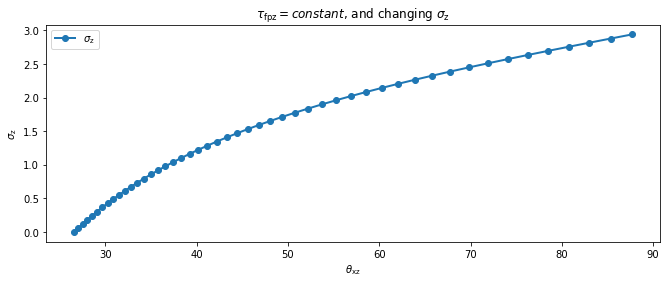

In [31]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

f_ct_val = 3
eta = 0.5
tau_xx = eta * f_ct_val
sigma_z = np.linspace(0, 3, 50)
theta_xz = get_theta_xz(tau_xx, f_ct_val, sigma_z)
sigma_x = get_sigma_x_val(tau_xx, f_ct_val, sigma_z)

ax1.plot(theta_xz * 180/ np.pi,  sigma_z, 'o-', lw= 2, label = r'$\sigma_{\mathrm{z}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'$\tau_{\mathrm{fpz}} = constant$, and changing $\sigma_{\mathrm{z}}$')
ax1.legend()
#plt.savefig("D:\Shear zones\Python plots\Angle of orientation with crack parallel stress.pdf")

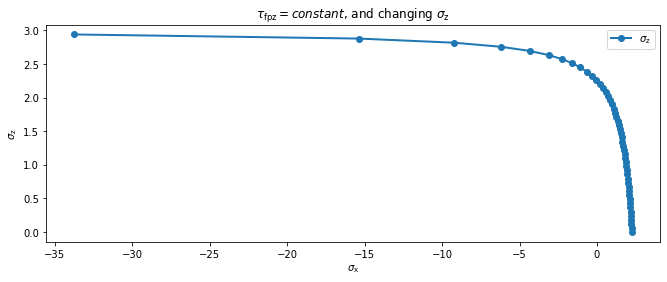

In [32]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
ax1.plot(sigma_x,  sigma_z, 'o-', lw= 2, label = r'$\sigma_{\mathrm{z}}}$')
ax1.set_xlabel(r'$\sigma_{\mathrm{x}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'$\tau_{\mathrm{fpz}} = constant$, and changing $\sigma_{\mathrm{z}}$')
ax1.legend()

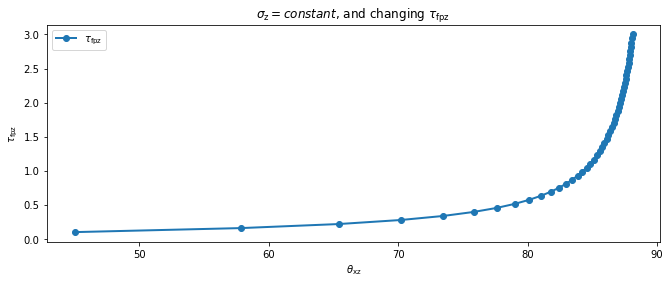

In [33]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

f_ct_val = 3
sigma_z = 2.9
tau_xx = np.linspace(0.1, 3, 50)
theta_xz = get_theta_xz(tau_xx, f_ct_val, sigma_z)
sigma_x = get_sigma_x_val(tau_xx, f_ct_val, sigma_z)

ax1.plot(theta_xz * 180/ np.pi,  tau_xx, 'o-', lw= 2, label = r'$\tau_{\mathrm{fpz}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\tau_{\mathrm{fpz}}$');
ax1.set_title(r'$\sigma_{\mathrm{z}} = constant$, and changing $\tau_{\mathrm{fpz}}$')
ax1.legend()

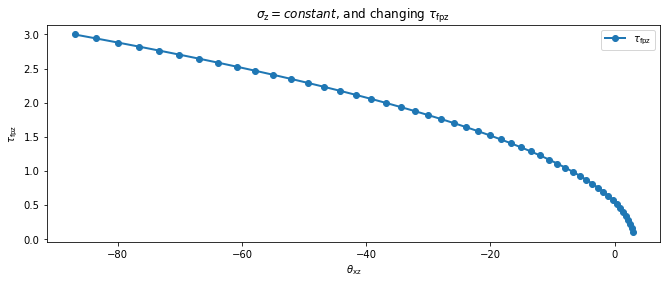

In [34]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

ax1.plot(sigma_x,  tau_xx, 'o-', lw= 2, label = r'$\tau_{\mathrm{fpz}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\tau_{\mathrm{fpz}}$');
ax1.set_title(r'$\sigma_{\mathrm{z}} = constant$, and changing $\tau_{\mathrm{fpz}}$')
ax1.legend()

In [35]:
f_ct_val = 3
tau_fpz_num = 10
tau_fpz = np.linspace(0.15,1.5, tau_fpz_num)
#eta = 0.2
#tau_xx = eta * f_ct_val
sig_z_num = 10
sigma_z = np.linspace(0, 2.9, sig_z_num)
theta = np.zeros([tau_fpz_num, sig_z_num])
for j in  range(len(sigma_z)):
    #print('sigma_z =', sigma_z[j])
    for i in range(len(tau_fpz)):
        #print('tau_fpz =', tau_fpz[i])
        theta_xz = get_theta_xz(tau_fpz[i], f_ct_val, sigma_z[j])
        theta[j, i] = theta_xz
print(theta * 180/ np.pi)

[[ 2.86240523  5.71059314  8.53076561 11.30993247 14.03624347 16.69924423
  19.29004622 21.80140949 24.22774532 26.56505118]
 [ 3.20616392  6.39237368  9.53941033 12.62945895 15.64665552 18.57747534
  21.41094931 24.13871535 26.75492879 29.25606522]
 [ 3.64363228  7.25803011 10.81534239 14.29032508 17.66127885 20.91063035
  24.02514838 26.99583839 29.81759164 32.48867651]
 [ 4.21909535  8.39292519 12.4790718  16.44037952 20.24662008 23.87528085
  27.31153375 30.54757175 33.58155292 36.41637852]
 [ 5.00987506  9.94429426 14.73440577 19.32318432 23.6684009  27.74320447
  31.53479191 35.0419294  38.27206407 41.23856252]
 [ 6.16405244 12.1886332  17.95232431 23.36434448 28.36904629 32.94323747
  37.08928054 40.82701552 44.18652433 47.20259816]
 [ 8.00472886 15.70863783 22.87366519 29.35775354 35.11201118 40.15599962
  44.54886145 48.36646066 51.68690933 54.58294472]
 [11.39213583 21.94869908 31.15202238 38.8677775  45.21299448 50.40379136
  54.66356095 58.1857613  61.12588603 63.60496547]


In [ ]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(13,6))
ax1.plot(theta[:,0] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.15}$')
ax1.plot(theta[:,1] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.3}$')
ax1.plot(theta[:,2] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.45}$')
ax1.plot(theta[:,3] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.6}$')
ax1.plot(theta[:,4] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.75}$')
ax1.plot(theta[:,5] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.9}$')
ax1.plot(theta[:,6] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.05}$')
ax1.plot(theta[:,7] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.2}$')
ax1.plot(theta[:,8] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.35}$')
ax1.plot(theta[:,9] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.5}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'Angle of orientation with crack parallel stress')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\Angle of orientation with crack parallel stress_sig_x.pdf")